In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
os.chdir('../datasets')

In [22]:
img_label = Image.open('train-labels.tif')
img_input = Image.open('train-volume.tif')

In [23]:
ny, nx = img_label.size
nframe = img_label.n_frames

In [29]:
nframe_train = 24
nframe_val = 3
nframe_test = 3
nframe_lst = [24, 3, 3]
dir_lst = ['train', 'val', 'test']

In [27]:
for dir_save in dir_lst:
    if not os.path.exists(dir_save):
        os.makedirs(dir_save)

In [28]:
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

In [31]:
offset_nframe = 0
for nframe_dir, dir_save in zip(nframe_lst, dir_lst):
    for i in range(nframe_dir):
        img_label.seek(id_frame[i + offset_nframe])
        img_input.seek(id_frame[i + offset_nframe])
        
        label_ = np.asarray(img_label)
        input_ = np.asarray(img_input)
        
        np.save(os.path.join(dir_save, 'label_%03d.npy' %i), label_)
        np.save(os.path.join(dir_save, 'input_%03d.npy' %i), input_)
        
    offset_nframe += nframe_dir

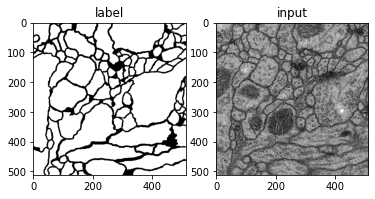

In [33]:
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()